### Problem Statement

The Personal Key Indicators of Heart Disease dataset contains 320K rows and 18 columns. It is a cleaned, smaller version of the 2020 annual CDC (Centers for Disease Control and Prevention) survey data of 400k adults. For each patient (row), it contains the health status of that individual. The data was collected in the form of surveys conducted over the phone. Each year, the CDC calls around 400K U.S residents and asks them about their health status, with the vast majority of questions being yes or no questions.

#### Dataset description The dataset contains several columns which are as follows -

* 1	**HeartDisease**- Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
* 2	**BMI**	- Body Mass Index (BMI)
* 3	**Smoking**- 	Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
* 4	**AlcoholDrinking**	Heavy drinkers - (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
* 5	**Stroke** -(Ever told) (you had) a stroke?
* 6	**PhysicalHealth**-	Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30
* 7	**MentalHealth**-	Thinking about your mental health, for how many days during the past 30 days was your mental health not good?
* 8	**DiffWalking**-	Do you have serious difficulty walking or climbing stairs?
* 9	**Sex**-	Are you male or female?
* 10 **AgeCategory**- Fourteen-level age category
* 11 **Race** -	Imputed race/ethnicity value
* 12 **Diabetic**- (Ever told) (you had) diabetes?
* 13 **PhysicalActivity**- Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
* 14 **GenHealth**- Would you say that in general your health is...
* 15 **SleepTime** -	On average, how many hours of sleep do you get in a 24-hour period?
* 16 **Asthma**	- (Ever told) (you had) asthma?
* 17 **KidneyDisease**- Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
* 18 **SkinCancer**- (Ever told) (you had) skin cancer?

#### Import the required libraries...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

##### Loading the data...

In [2]:
data= pd.read_csv('heart1.csv')

In [3]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
print('Rows:', data.shape[0])
print('Columns:', data.shape[1])

Rows: 319795
Columns: 18


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
data.describe(include=object)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [8]:
data.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


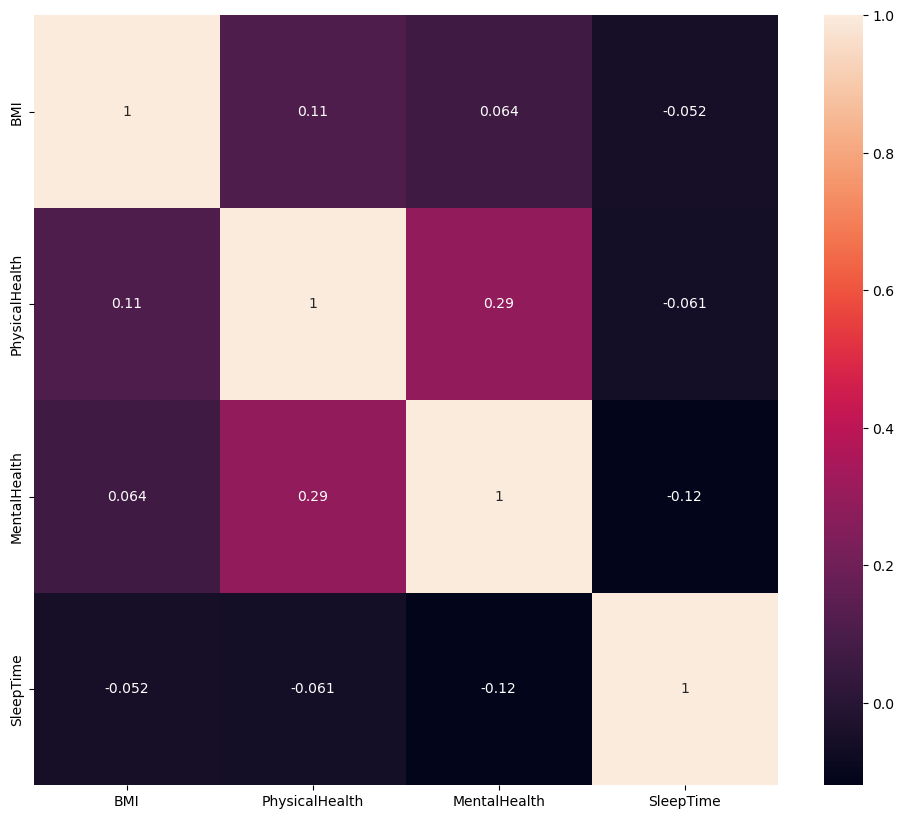

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot= True)
plt.show()

#### Data Preparation...

In [10]:
# Checking for missing values..

data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

* The data has no missing values.

In [11]:
# Checking for duplicate values...

data[data.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data[data.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer


### Univariate and Bivariate Analysis..

In [14]:
num_cols= data.select_dtypes(np.number).columns
num_cols

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [15]:
cat_cols= data.select_dtypes('O').columns
cat_cols

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

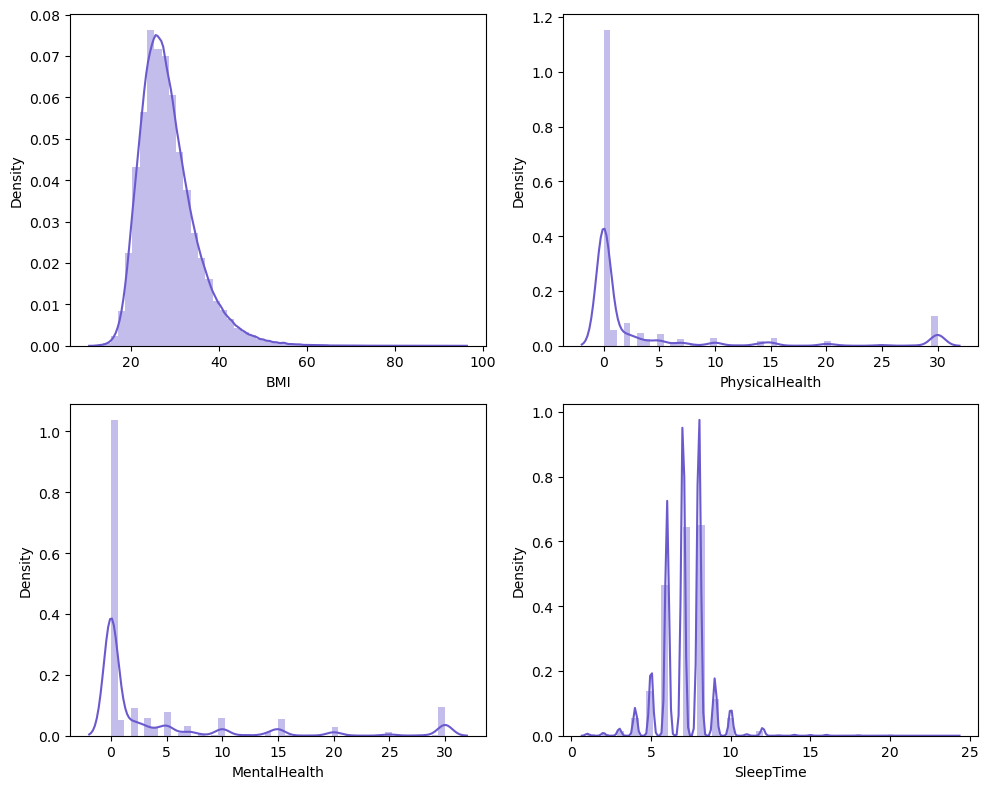

In [16]:
plt.figure(figsize=(10,8))
t=1
for i in num_cols:
    plt.subplot(2,2,t)
    sns.distplot(data[i], color='slateblue')
    t+=1
    
plt.tight_layout()
plt.show()

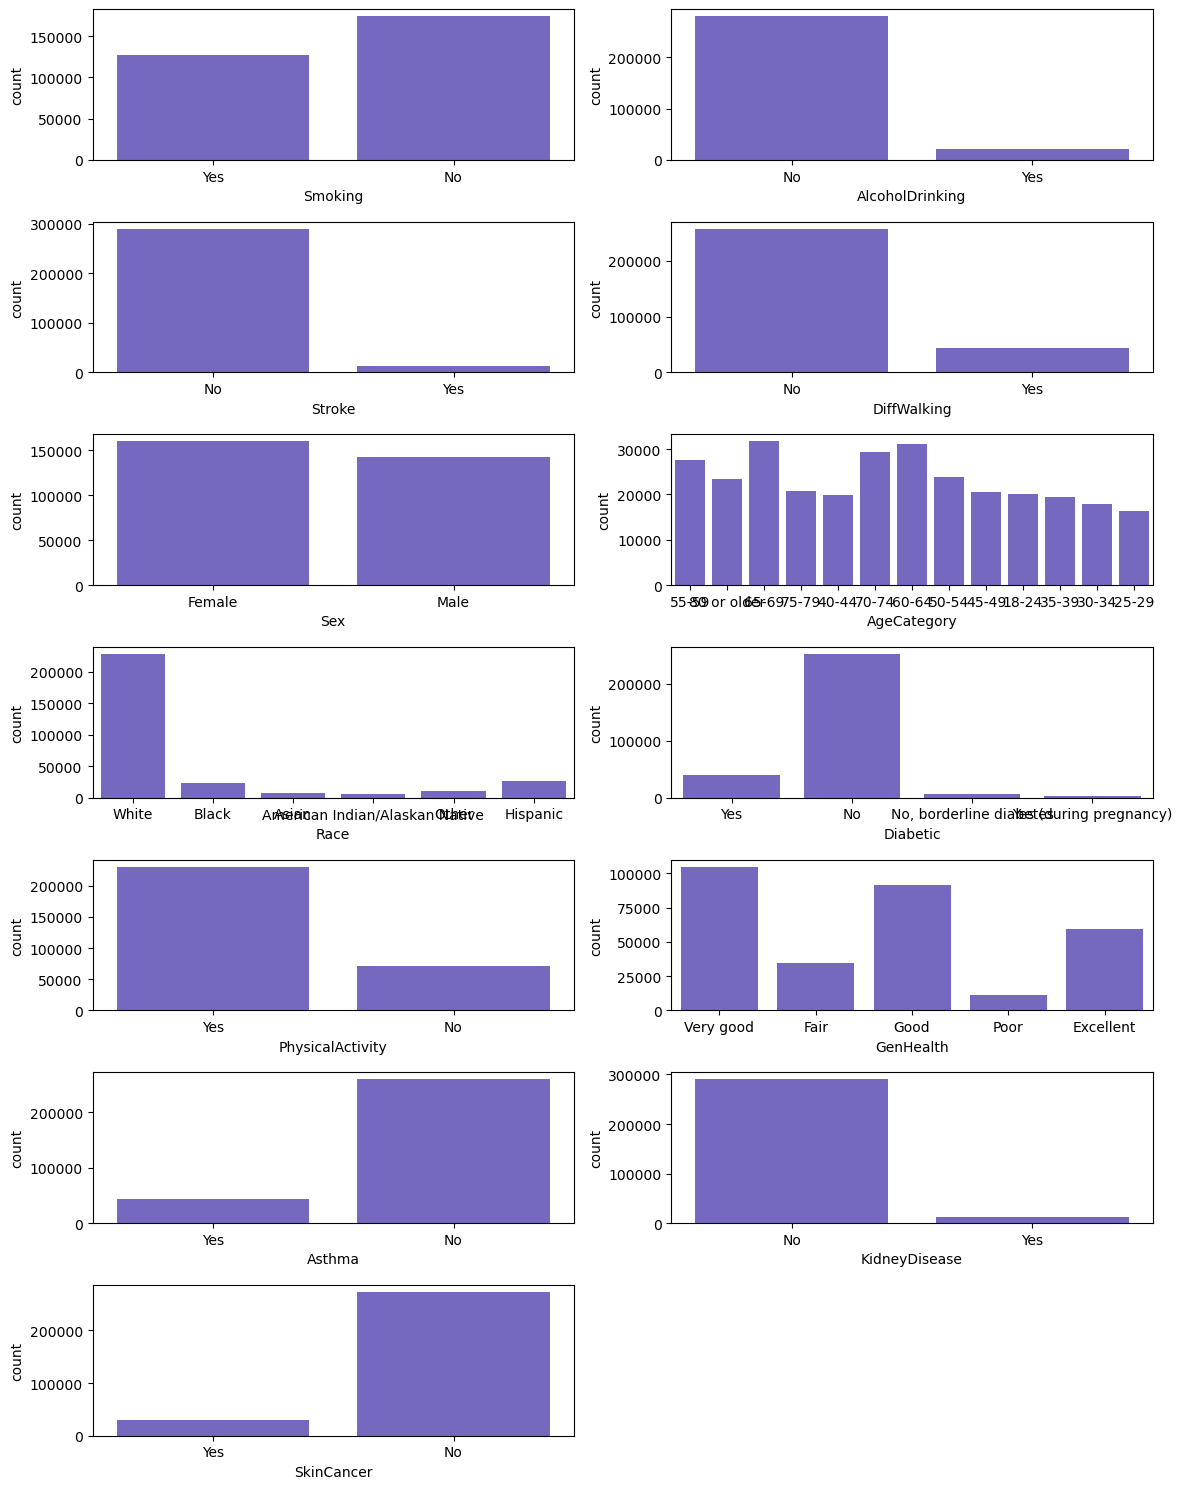

In [17]:
plt.figure(figsize=(12,15))
t=1
for i in cat_cols:
    if i !='HeartDisease':
        plt.subplot(7,2,t)
        sns.countplot(x=data[i], color='slateblue')
        t+=1
plt.tight_layout()
plt.show()

##### Bivariate Analysis...

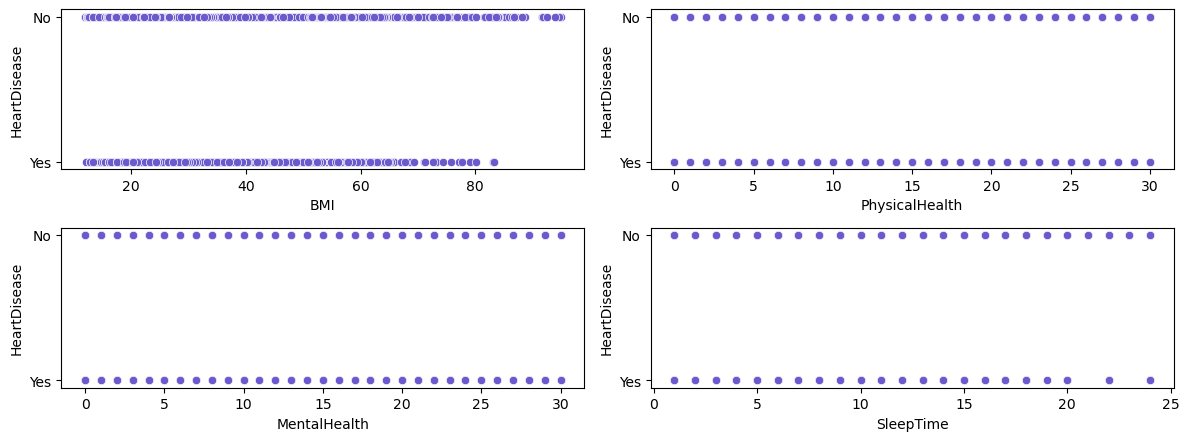

In [18]:
plt.figure(figsize=(12,15))
t=1
for i in num_cols:
    plt.subplot(7,2,t)
    sns.scatterplot(x=data[i], y= data['HeartDisease'],color='slateblue')
    t+=1
plt.tight_layout()
plt.show()

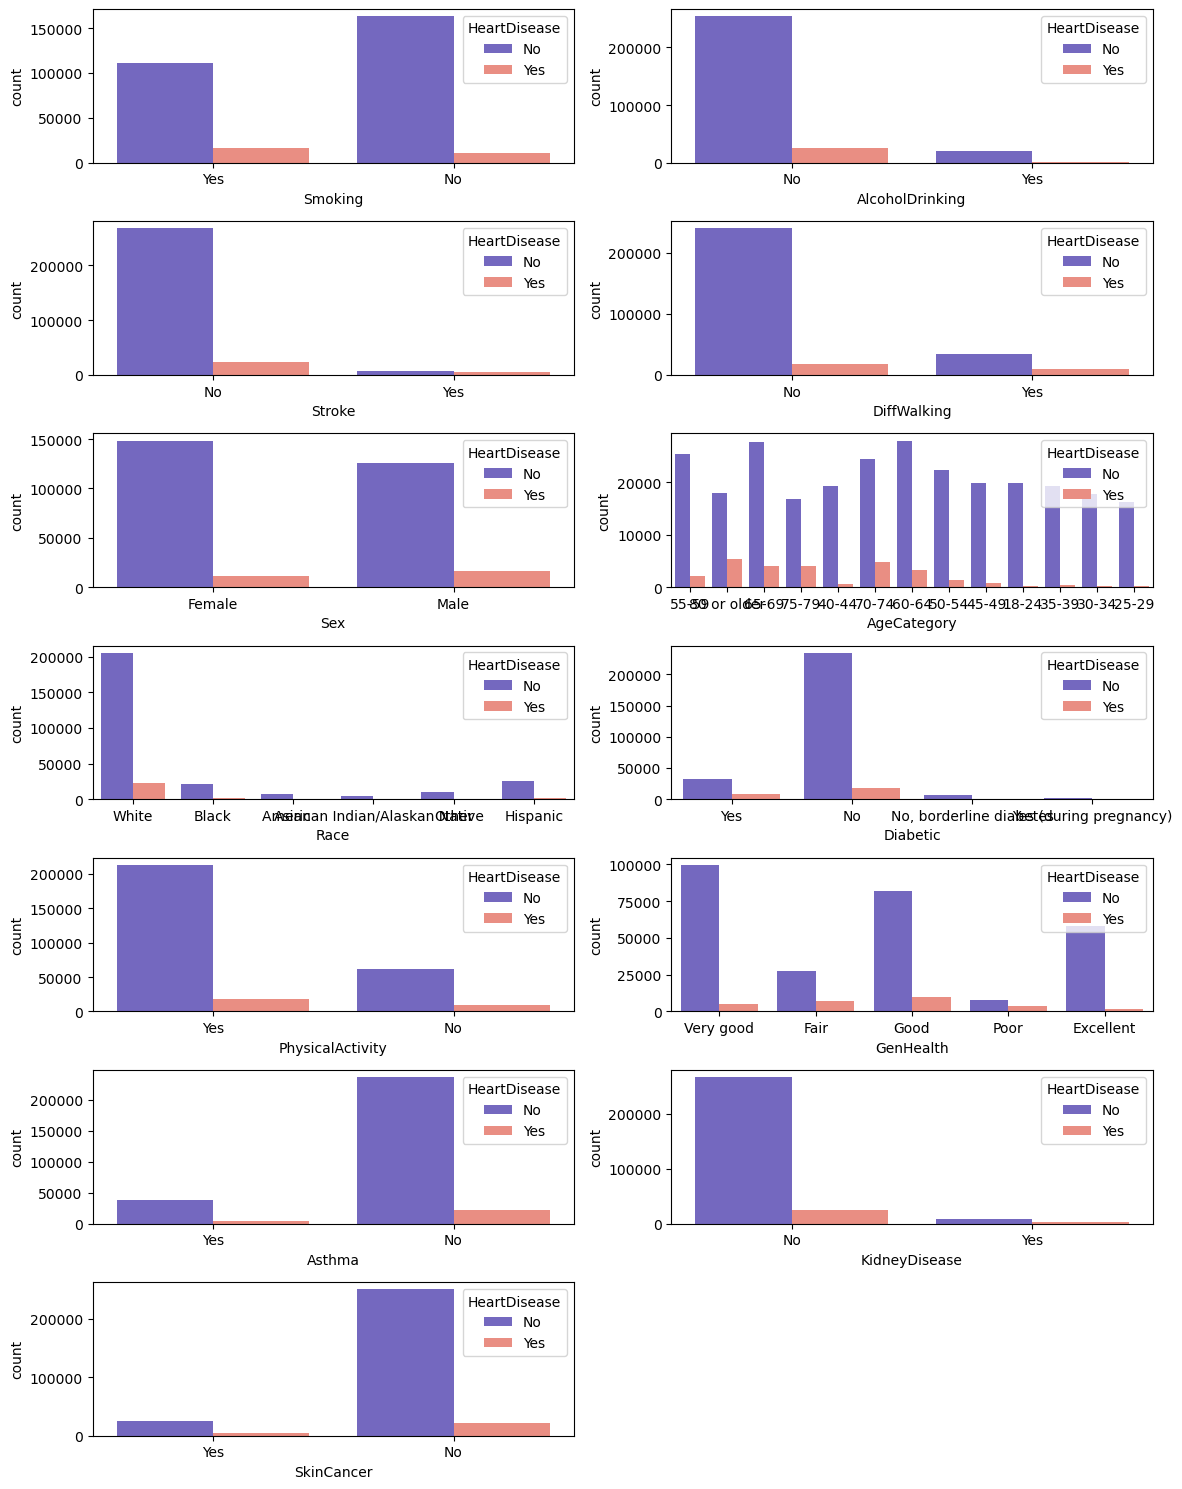

In [19]:
plt.figure(figsize=(12,15))
t=1
for i in cat_cols:
    if i !='HeartDisease':
        plt.subplot(7,2,t)
        sns.countplot(x=data[i],hue= data['HeartDisease'], palette=['slateblue', 'salmon'])
        t+=1
plt.tight_layout()
plt.show()

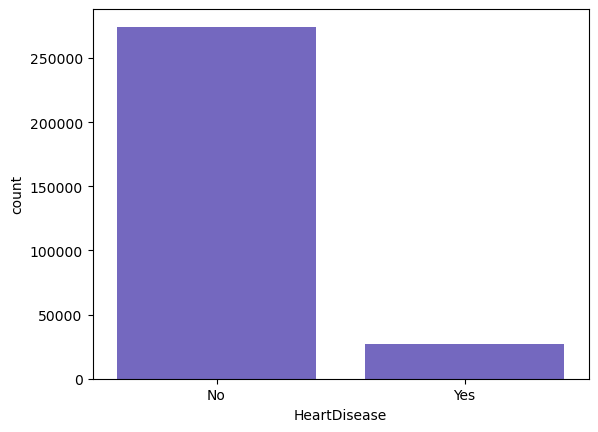

In [20]:
sns.countplot(x=data['HeartDisease'], color='slateblue')
plt.show()

**Inferences**   

* As we can see that the target variable is quite imbalanced.
* The persons who are smoker are comarartively more chances of heart disease.
* Male have high chance of heart disease as compared to female.
* Those are are asthamatic have high chance of heart disease which is contradictory.
* If the person will take 7-8 hours of sleep then the cance pf heart disease is less.
* BMI and mental haelth has no good relation with Heart Disease.

### Feature Engineering/ Feature Selection

#####  Outlier Detection..

In [21]:
num_cols=data.select_dtypes(np.number).columns

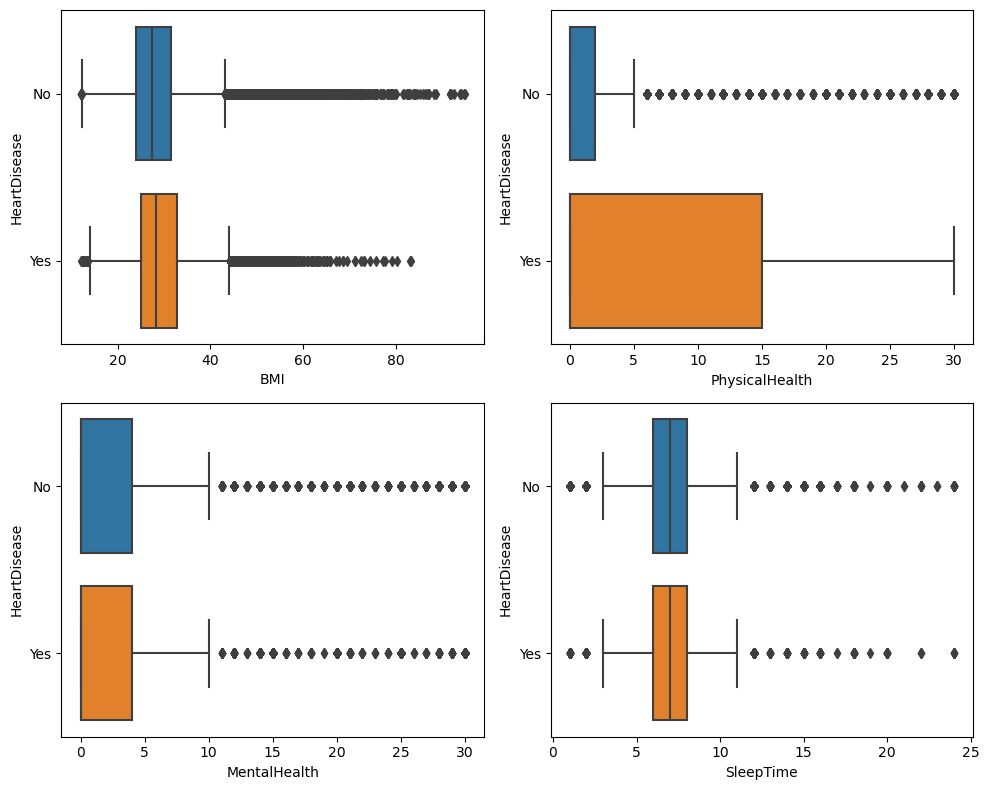

In [22]:
plt.figure(figsize=(10,8))
t=1
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(x= data[i], y=data['HeartDisease'])
    t+=1
    
plt.tight_layout()
plt.show()

In [23]:
for i in num_cols:
    q1,q3= np.quantile(data[i], [0.25, 0.75])
    iqr= q3-q1
    ul= q3+(1.5*iqr)
    ll= q1-(1.5*iqr)

In [24]:
data= data[~((data[i]>ul) | (data[i]<ll))]

In [25]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No


In [26]:
# We can make the Age category column as Age by giving the unique value for every category.

In [27]:
data['AgeCategory'].value_counts()

65-69          31209
60-64          30719
70-74          28820
55-59          27185
50-54          23396
80 or older    22730
75-79          20292
45-49          20255
18-24          19732
40-44          19599
35-39          19310
30-34          17784
25-29          16144
Name: AgeCategory, dtype: int64

In [28]:
agec= {'65-69': 67, '60-64': 62,'70-74': 72,'55-59': 57,'50-54':52,'80 or older':80,'75-79':77,'45-49':47,
       '18-24':20,'40-44':42,'35-39':37,'30-34':32,'25-29':27}

In [29]:
data['Age']= data['AgeCategory'].map(agec)

In [30]:
data.drop(columns=['AgeCategory'], axis=1, inplace=True)

In [31]:
data['GenHealth'].value_counts()

Very good    103847
Good          89920
Excellent     59168
Fair          33675
Poor          10565
Name: GenHealth, dtype: int64

In [32]:
ghealth= {'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}

In [33]:
data['GenHealth']= data['GenHealth'].map(ghealth)

In [34]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,White,Yes,Yes,3,5.0,Yes,No,Yes,57
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,White,No,Yes,3,7.0,No,No,No,80
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,White,Yes,Yes,1,8.0,Yes,No,No,67
3,No,24.21,No,No,No,0.0,0.0,No,Female,White,No,No,2,6.0,No,No,Yes,77
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,White,No,Yes,3,8.0,No,No,No,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,22.22,No,No,No,0.0,0.0,No,Female,Hispanic,No,Yes,4,8.0,No,No,No,20
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,Hispanic,Yes,No,1,6.0,Yes,No,No,62
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,Hispanic,No,Yes,3,5.0,Yes,No,No,37
319792,No,24.24,No,No,No,0.0,0.0,No,Female,Hispanic,No,Yes,2,6.0,No,No,No,47


### Feature Selection

In [35]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,White,Yes,Yes,3,5.0,Yes,No,Yes,57
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,White,No,Yes,3,7.0,No,No,No,80
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,White,Yes,Yes,1,8.0,Yes,No,No,67
3,No,24.21,No,No,No,0.0,0.0,No,Female,White,No,No,2,6.0,No,No,Yes,77
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,White,No,Yes,3,8.0,No,No,No,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,22.22,No,No,No,0.0,0.0,No,Female,Hispanic,No,Yes,4,8.0,No,No,No,20
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,Hispanic,Yes,No,1,6.0,Yes,No,No,62
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,Hispanic,No,Yes,3,5.0,Yes,No,No,37
319792,No,24.24,No,No,No,0.0,0.0,No,Female,Hispanic,No,Yes,2,6.0,No,No,No,47


###### Pearson Correlation Test

* Pearson correlation is used to measure how strong the relationship is between two variables.

<Axes: >

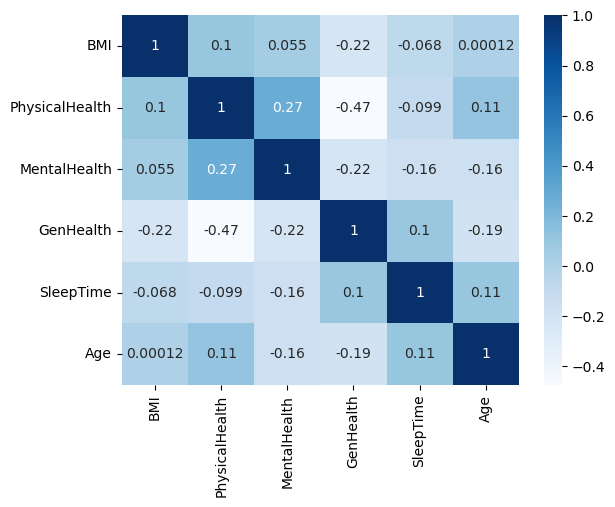

In [36]:
sns.heatmap(data.corr(), annot= True, cmap='Blues')

In [37]:
# As we can see in the above graph, there is no strong correlation amoung the columns.

In [38]:
# Now we can convert the categorical columns to the numerical columns...

#### Label Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le= LabelEncoder()

In [41]:
for i in data.select_dtypes('O').columns:
    data[i]= le.fit_transform(data[i])

In [42]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age
0,0,16.60,1,0,0,3.0,30.0,0,0,5,2,1,3,5.0,1,0,1,57
1,0,20.34,0,0,1,0.0,0.0,0,0,5,0,1,3,7.0,0,0,0,80
2,0,26.58,1,0,0,20.0,30.0,0,1,5,2,1,1,8.0,1,0,0,67
3,0,24.21,0,0,0,0.0,0.0,0,0,5,0,0,2,6.0,0,0,1,77
4,0,23.71,0,0,0,28.0,0.0,1,0,5,0,1,3,8.0,0,0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,22.22,0,0,0,0.0,0.0,0,0,3,0,1,4,8.0,0,0,0,20
319790,1,27.41,1,0,0,7.0,0.0,1,1,3,2,0,1,6.0,1,0,0,62
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,0,1,3,5.0,1,0,0,37
319792,0,24.24,0,0,0,0.0,0.0,0,0,3,0,1,2,6.0,0,0,0,47


#### Chi Square Test on the data...

**Chi-Square test to check how each input categorical data impacting the target variable.**

In [51]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Race',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Age'],
      dtype='object')

In [53]:
from sklearn.feature_selection import chi2

In [54]:
#split dataset in features and target variable
cat_data= data[['Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'Sex', 'Race',
       'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma','KidneyDisease', 'SkinCancer']]

y= data['HeartDisease']

In [56]:
#returns f score and p value
f_score= chi2(cat_data, y)
f_score

(array([ 1842.15895018,   372.68106317, 10345.63414995,  9488.37650217,
          884.39344472,   192.59501819, 13244.64486018,   578.27282974,
         6968.91459374,   297.25924862,  5687.15428237,  2207.3581741 ]),
 array([0.00000000e+000, 4.88032975e-083, 0.00000000e+000, 0.00000000e+000,
        2.42399201e-194, 8.62808273e-044, 0.00000000e+000, 8.90792130e-128,
        0.00000000e+000, 1.30286009e-066, 0.00000000e+000, 0.00000000e+000]))

In [61]:
p_value= pd.Series(f_score[1], index= cat_data.columns)
p_value= p_value.sort_values(ascending=True)
print(p_value)

Smoking              0.000000e+00
Stroke               0.000000e+00
DiffWalking          0.000000e+00
Diabetic             0.000000e+00
GenHealth            0.000000e+00
KidneyDisease        0.000000e+00
SkinCancer           0.000000e+00
Sex                 2.423992e-194
PhysicalActivity    8.907921e-128
AlcoholDrinking      4.880330e-83
Asthma               1.302860e-66
Race                 8.628083e-44
dtype: float64


**According to Chi-Square (Test of Independence)**
* 1. Null Hypothesis(H0)-> Features are independent to each other.
* 2. Alternate Hypothesis(Ha) -> Features are dependent.
* If p-value ≥ 0.05, we failed to reject null hypothesis there is no relationship between target variable and input
categorical features.
* If p_value < 0.05, we can reject the null hypothesis that means target variables are dependent on input
categorical variable.

In [64]:
significance_level= 0.05
for i in p_value.index:
    if p_value[i]>significance_level:
        print(i, "  :",'Failed to Reject Null Hypothesis')
    else:
         print(i, "  :",'Reject Null Hypothesis')

Smoking   : Reject Null Hypothesis
Stroke   : Reject Null Hypothesis
DiffWalking   : Reject Null Hypothesis
Diabetic   : Reject Null Hypothesis
GenHealth   : Reject Null Hypothesis
KidneyDisease   : Reject Null Hypothesis
SkinCancer   : Reject Null Hypothesis
Sex   : Reject Null Hypothesis
PhysicalActivity   : Reject Null Hypothesis
AlcoholDrinking   : Reject Null Hypothesis
Asthma   : Reject Null Hypothesis
Race   : Reject Null Hypothesis


**We can observe from chi-square test that every feature have some relation with the target variable, i.e., these
input features is important for making prediction.**

#### Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X= data.drop('HeartDisease', axis=1)
y= data['HeartDisease']

In [45]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=23)

In [46]:
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(237740, 17) (237740,) (59435, 17) (59435,)


#### Now balance the target variable....

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
sm= SMOTE(random_state=23)
X_sm, y_sm= sm.fit_resample(X,y)

In [49]:
X_train, X_test, y_train, y_test= train_test_split(X_sm, y_sm, test_size=0.20, random_state=23)

In [50]:
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(433097, 17) (433097,) (108275, 17) (108275,)


### Model Building and Evaluation

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,  roc_auc_score, f1_score, confusion_matrix, classification_report

### Decision Tree

In [66]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [67]:
# Making Prediction
y_pred_dt = dt.predict(X_test)

In [68]:
# Evaluation

print('Accuracy Score:', accuracy_score(y_test, y_pred_dt))
print('F1 Score:', f1_score(y_test, y_pred_dt))
print('Classification Report:', classification_report(y_test, y_pred_dt))

Accuracy Score: 0.8701362271992611
F1 Score: 0.8719177271112487
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.86      0.87     54173
           1       0.86      0.88      0.87     54102

    accuracy                           0.87    108275
   macro avg       0.87      0.87      0.87    108275
weighted avg       0.87      0.87      0.87    108275



### Random Forest

In [69]:
rf= RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
# Making Predictions
y_pred_rf= rf.predict(X_test)

In [72]:
# Evaluation

print('Accuracy Score:' ,accuracy_score(y_test, y_pred_rf))
print('F1 Score:', f1_score(y_test, y_pred_rf))
print('Classification Report:', classification_report(y_test, y_pred_rf))

Accuracy Score: 0.9038189794504733
F1 Score: 0.9051064295086747
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.89      0.90     54173
           1       0.89      0.92      0.91     54102

    accuracy                           0.90    108275
   macro avg       0.90      0.90      0.90    108275
weighted avg       0.90      0.90      0.90    108275



### Ada Boost

In [74]:
ad= AdaBoostClassifier()
ad.fit(X_train, y_train)

AdaBoostClassifier()

In [75]:
# Making Prediction
y_pred_ad= ad.predict(X_test)

In [77]:
# Evaluation

print('Accuracy Score:', accuracy_score(y_test, y_pred_ad))
print('F1 Score:' ,f1_score(y_test, y_pred_ad))
print('Classification report:', classification_report(y_test, y_pred_ad))

Accuracy Score: 0.8033895174324637
F1 Score: 0.8062684285246259
Classification report:               precision    recall  f1-score   support

           0       0.81      0.79      0.80     54173
           1       0.79      0.82      0.81     54102

    accuracy                           0.80    108275
   macro avg       0.80      0.80      0.80    108275
weighted avg       0.80      0.80      0.80    108275



### Gradient Boost

In [78]:
gdb= GradientBoostingClassifier()
gdb.fit(X_train, y_train)

GradientBoostingClassifier()

In [79]:
# Making Prediction
y_pred_gdb= gdb.predict(X_test)

In [83]:
# Evaluation

print('Accuracy Score:' ,accuracy_score(y_test, y_pred_gdb))
print('F1 Score:' ,f1_score(y_test, y_pred_gdb))
print('Classification Report:', classification_report(y_test, y_pred_gdb))

Accuracy Score: 0.832112676056338
F1 Score: 0.8358467734652965
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.81      0.83     54173
           1       0.82      0.86      0.84     54102

    accuracy                           0.83    108275
   macro avg       0.83      0.83      0.83    108275
weighted avg       0.83      0.83      0.83    108275



### XG Boost

In [82]:
xgb= XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [84]:
# Making Prediction

y_pred_xgb= xgb.predict(X_test)

In [85]:
# Evaluation

print('Accuracy Score:' ,accuracy_score(y_test, y_pred_xgb))
print('F1 Score:' ,f1_score(y_test, y_pred_xgb))
print('Classification Report:', classification_report(y_test, y_pred_xgb))

Accuracy Score: 0.8797968136688986
F1 Score: 0.8792503595119914
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.88      0.88     54173
           1       0.88      0.88      0.88     54102

    accuracy                           0.88    108275
   macro avg       0.88      0.88      0.88    108275
weighted avg       0.88      0.88      0.88    108275



### Plotting Confusion Matrix
**Since the evaluation score (Accuracy score & F1-score) of Random Forest is highest, we can plot the confusion
matrix for the result we got with Random Forest.**

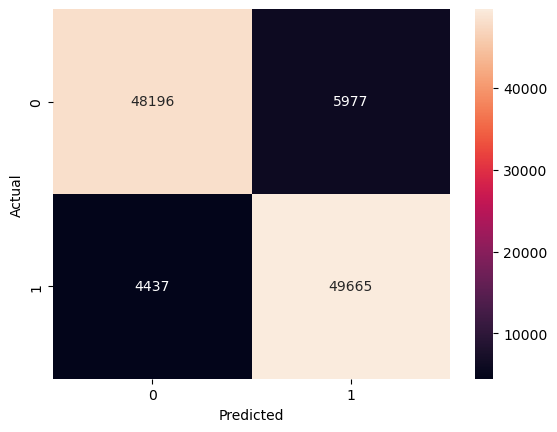

In [90]:
# Confusion Matrix

cm= confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Building a Predictive Model

In [92]:
X_test

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age
497368,24.169661,0,0,0,20.0,0.000000,0,0,5,0,0,1,7.708474,0,0,0,80
355894,25.788075,0,0,0,0.0,0.576942,0,0,5,0,1,3,7.423058,0,0,0,62
254458,39.530000,0,0,0,15.0,30.000000,0,0,5,0,1,1,9.000000,1,0,0,37
437639,26.571281,1,0,1,0.0,0.000000,0,0,5,0,1,3,8.871868,0,0,0,77
413346,32.635698,0,0,0,0.0,30.000000,1,0,5,0,0,1,7.914614,0,0,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223073,18.560000,1,0,0,0.0,3.000000,0,1,5,0,1,2,5.000000,0,0,0,32
137255,28.890000,1,0,0,30.0,0.000000,1,1,5,0,0,0,5.000000,1,0,0,77
220359,35.240000,0,0,0,15.0,10.000000,1,0,0,2,0,0,5.000000,0,1,0,52
117809,27.460000,0,0,0,14.0,6.000000,0,0,2,0,1,3,8.000000,0,0,0,27


In [94]:
X_test.loc[220359]

BMI                 35.24
Smoking              0.00
AlcoholDrinking      0.00
Stroke               0.00
PhysicalHealth      15.00
MentalHealth        10.00
DiffWalking          1.00
Sex                  0.00
Race                 0.00
Diabetic             2.00
PhysicalActivity     0.00
GenHealth            0.00
SleepTime            5.00
Asthma               0.00
KidneyDisease        1.00
SkinCancer           0.00
Age                 52.00
Name: 220359, dtype: float64

In [96]:
input_data = (35.24, 0, 0, 0, 15, 10, 1, 0, 0, 2, 0, 0, 5, 0, 1, 0, 52)
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)
# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = rf.predict(input_data_reshaped)
print(prediction)
if (prediction[0]== 0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[1]
The Person has Heart Disease
